# PCA Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

## Download from PED and Load Data

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis

ens_codes = [
    'PED00423e001',
    'PED00424e001',
    'PED00160e001'
]
data_dir = 'C:/Users/nikol/Documents/test_dir/ped'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='ped')
analysis.generate_trajectories()

Ensemble PED00423e001 already downloaded. Skipping.
File PED00423e001.pdb already exists. Skipping extraction.
Ensemble PED00424e001 already downloaded. Skipping.
File PED00424e001.pdb already exists. Skipping extraction.
Ensemble PED00160e001 already downloaded. Skipping.
File PED00160e001.pdb already exists. Skipping extraction.
Trajectory already exists for ensemble PED00423e001. Loading trajectory.
Trajectory already exists for ensemble PED00424e001. Loading trajectory.
Trajectory already exists for ensemble PED00160e001. Loading trajectory.


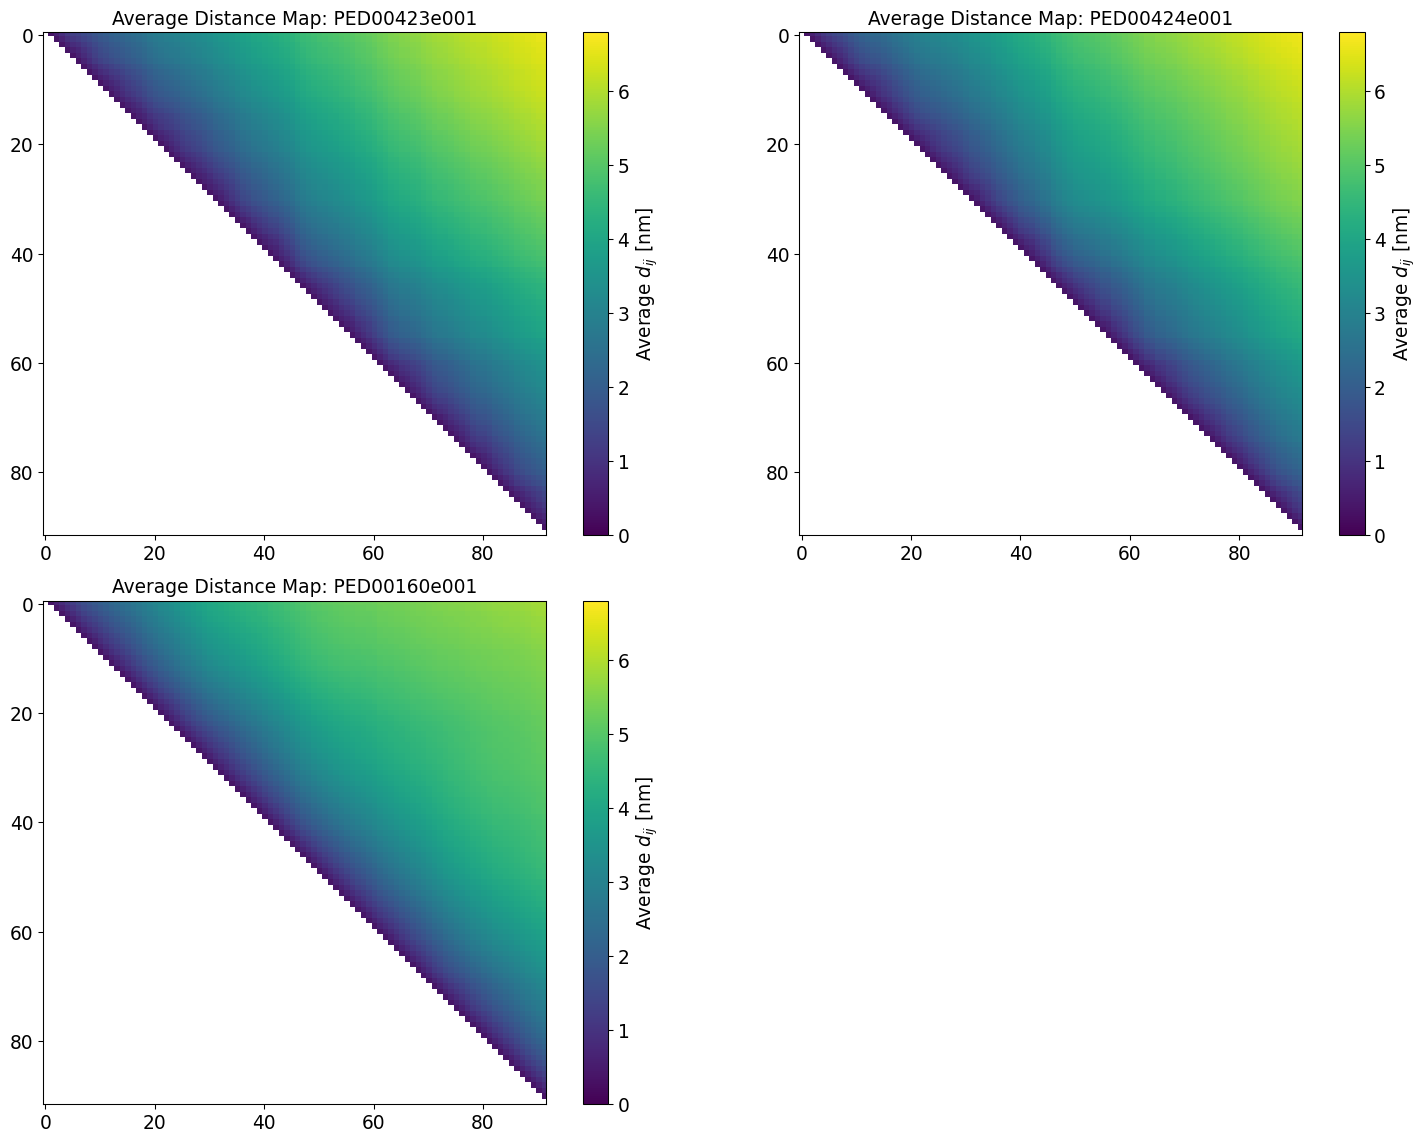

In [3]:
from dpet.visualization import Visualization


visualization = Visualization(analysis)
visualization.plot_average_dmap_comparison()

## Featurization

In [4]:
analysis.extract_features(featurization='ca_dist', normalize=False)

Performing feature extraction for Ensemble: PED00423e001.
Transformed ensemble shape: (1000, 4095)
Performing feature extraction for Ensemble: PED00424e001.
Transformed ensemble shape: (1000, 4095)
Performing feature extraction for Ensemble: PED00160e001.
Transformed ensemble shape: (500, 4095)
Feature names: ['GLY1-MET3', 'GLY1-THR4', 'GLY1-PRO5', 'GLY1-SER6', 'GLY1-THR7', 'GLY1-PRO8', 'GLY1-PRO9', 'GLY1-ARG10', 'GLY1-SER11', 'GLY1-ARG12', 'GLY1-GLY13', 'GLY1-THR14', 'GLY1-ARG15', 'GLY1-TYR16', 'GLY1-LEU17', 'GLY1-ALA18', 'GLY1-GLN19', 'GLY1-PRO20', 'GLY1-SER21', 'GLY1-GLY22', 'GLY1-ASN23', 'GLY1-THR24', 'GLY1-SER25', 'GLY1-SER26', 'GLY1-SER27', 'GLY1-ALA28', 'GLY1-LEU29', 'GLY1-MET30', 'GLY1-GLN31', 'GLY1-GLY32', 'GLY1-GLN33', 'GLY1-LYS34', 'GLY1-THR35', 'GLY1-PRO36', 'GLY1-GLN37', 'GLY1-LYS38', 'GLY1-PRO39', 'GLY1-SER40', 'GLY1-GLN41', 'GLY1-ASN42', 'GLY1-LEU43', 'GLY1-VAL44', 'GLY1-PRO45', 'GLY1-VAL46', 'GLY1-THR47', 'GLY1-PRO48', 'GLY1-SER49', 'GLY1-THR50', 'GLY1-THR51', 'GLY1-LYS

## Dimensionality Reduction

In [5]:
analysis.reduce_features(method='pca')

Concatenated featurized ensemble shape: (2500, 4095)
Reduced dimensionality ensemble shape: (1000, 10)
Reduced dimensionality ensemble shape: (1000, 10)
Reduced dimensionality ensemble shape: (500, 10)


## Analysis

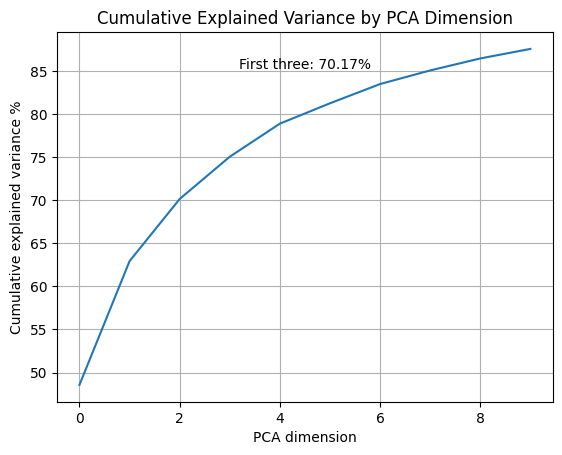

In [6]:
visualization.pca_cumulative_explained_variance()

### Plot 2D Landscapes

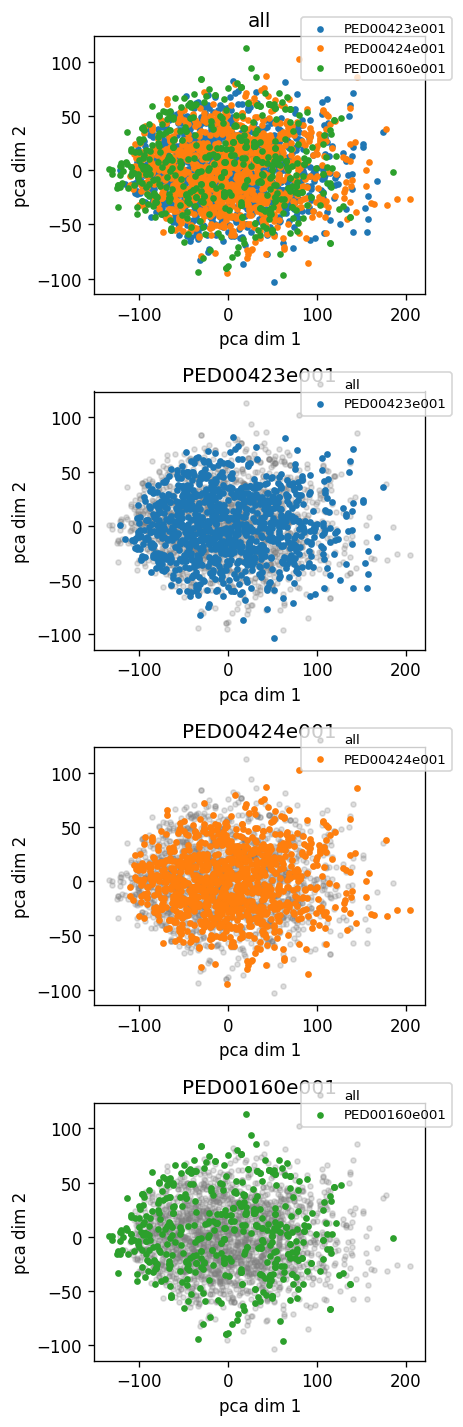

In [7]:
visualization.pca_plot_2d_landscapes(save=True)

### 1D Histograms

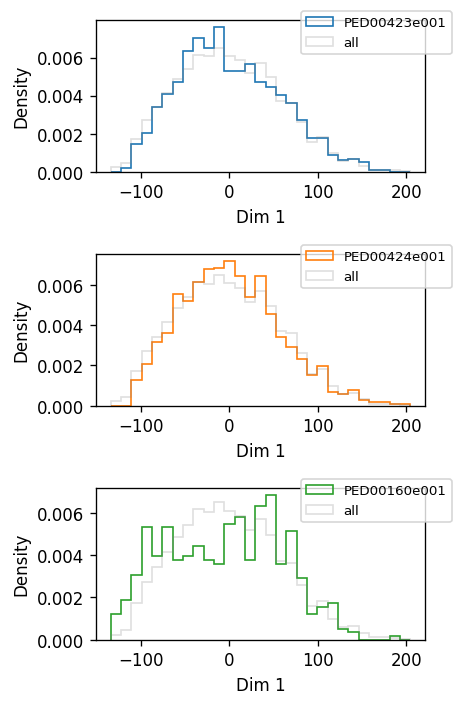

In [8]:
visualization.pca_plot_1d_histograms(save=True)

### Is PC 1 from Ca-Ca correlated with Rg? For fully intrinsically disordered proteins, this is what happens.

An hallmark of fully-disordered ensembles at a global level is the following: when you do PCA with Ca-Ca distances, typically PC dimension 1 is strongly correlated with Rg, it describes changes in chain compactness. This is what happens in Sic1 ensembles too. 

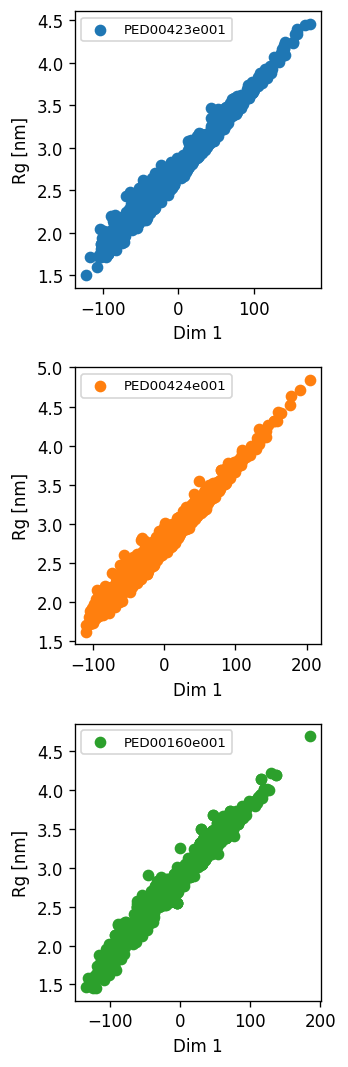

In [9]:
visualization.pca_rg_correlation(save=True)

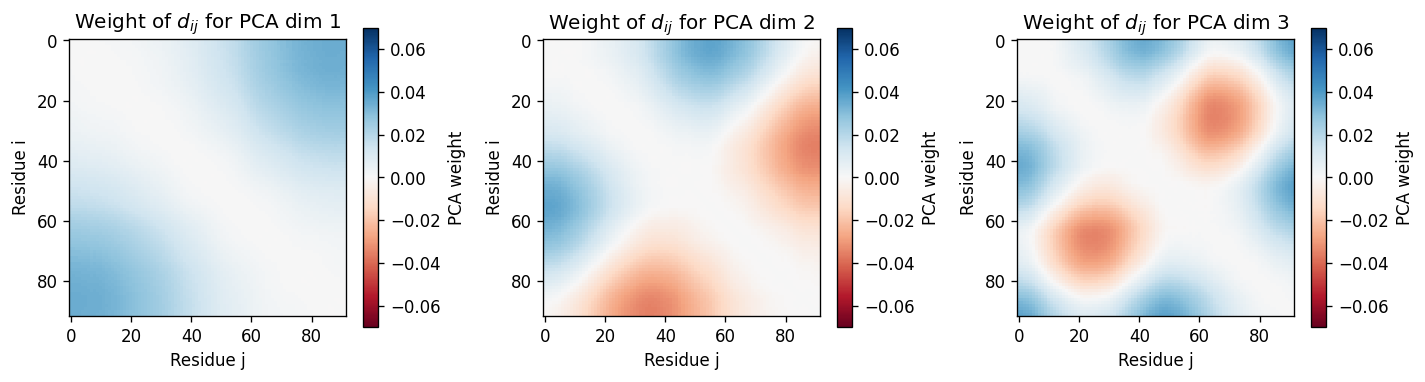

In [10]:
num_residues = 92# Number of residues in the protein.
sel_dims = [0, 1, 2]  # Dimensionality reduction feature we want to analyze
visualization.pca_correlation_plot(num_residues=num_residues, sel_dims=sel_dims)

Plots saved to C:\Users\nikol\Documents\test_dir\ped\plots\pca.pdf


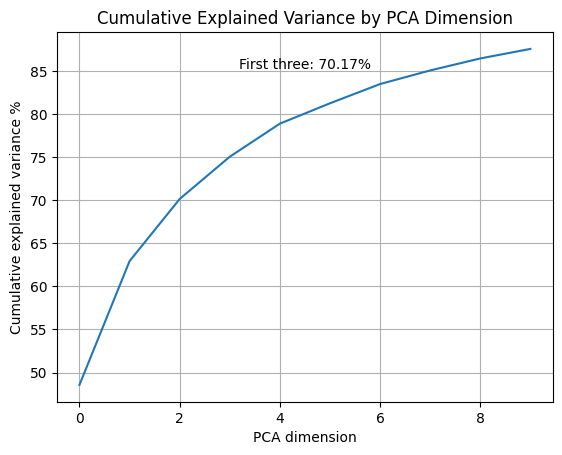

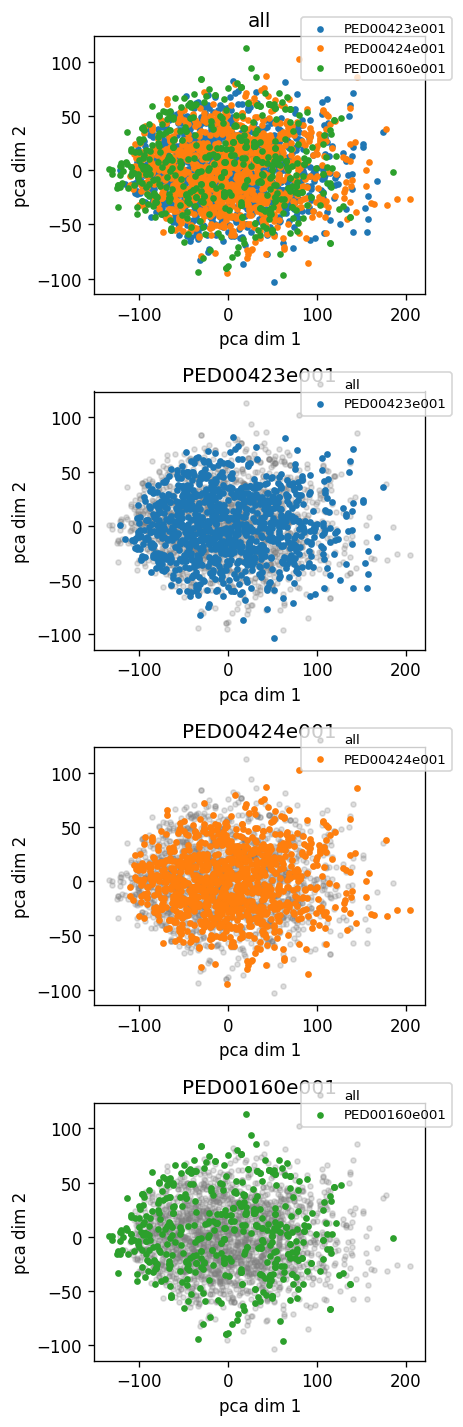

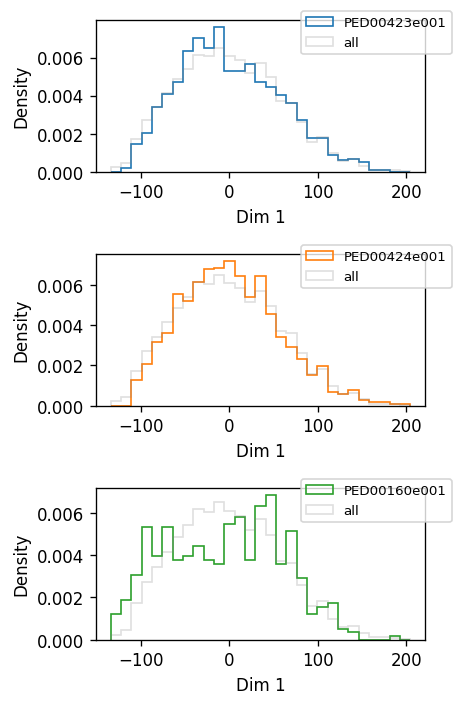

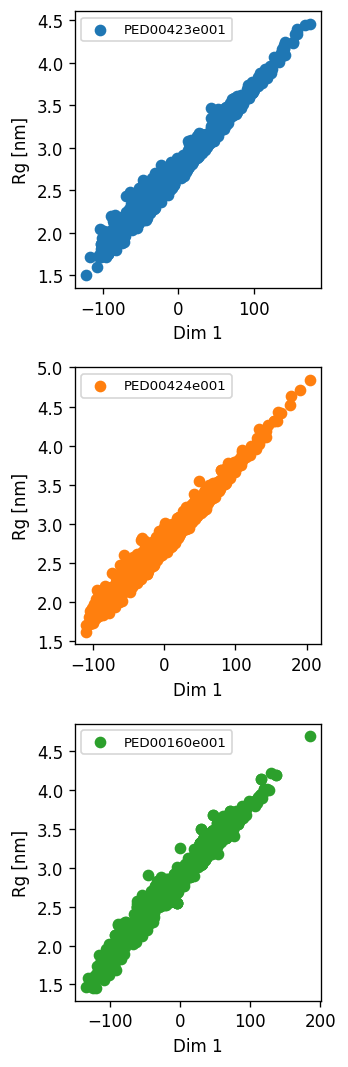

In [11]:
visualization.generate_report()